In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import json

In [2]:
df = pd.read_csv('labelled_2021may-ip-10-100-1-4.csv', encoding='utf-8')

In [6]:
df['hostName'].value_counts()

hostName
ip-10-100-1-4    485241
Name: count, dtype: int64

In [7]:
allusers = list(set(df['userId'].to_list()))

In [8]:
def prepare_userId_timeseries(df, userid):
    userdf = df[df['userId']==userid]
    userdf = userdf.sort_values(by='timestamp', ascending=True)

    userdf = userdf.reset_index(drop=True)
    userdf['timestamp'] = userdf['timestamp'].apply(lambda x: round(x, 3))
    userdf['count'] = 1
    userdf = userdf.groupby('timestamp').sum()

    #plot timeseries
    fig, ax = plt.subplots()
    print('userID:')
    print(userid)
    ax.plot(userdf.index, 
           userdf['count'])
    plt.show()

In [9]:
def prepare_processID_timeseries(df, userid):

    userdf = df[df['userId']==userid]
    userdf = userdf.sort_values(by='timestamp', ascending=True)
    
    pids = list(set(userdf['processId'].to_list()))
    
    for pid in pids:
        timeseries = userdf[userdf['processId']==pid]
        timeseries = timeseries.reset_index(drop=True)
        timeseries['timestamp'] = timeseries['timestamp'].apply(lambda x: round(x, 3))
        timeseries['count'] = 1
        timeseries = timeseries.groupby('timestamp').sum()

        #plot timeseries
        fig, ax = plt.subplots()
        print('processId:')
        print(pid)
        ax.plot(timeseries.index, 
               timeseries['count'])
        plt.show()

In [10]:
def prepare_event_timeseries(userdf, eventName):
    timeseries = userdf[userdf['eventName']==eventName]
    timeseries = timeseries.reset_index(drop=True)
    timeseries['timestamp'] = timeseries['timestamp'].apply(lambda x: round(x, 3))
    timeseries['count'] = 1
    timeseries = timeseries.groupby('timestamp').sum()

    return timeseries

In [11]:
def prepare_all_user_event_timeseries(df, userid):

    userdf = df[df['userId']==userid]
    userdf = userdf.sort_values(by='timestamp', ascending=True)
    
    events = list(set(userdf['eventName'].to_list()))

    timeseries_list = []
    
    for event in events:
        timeseries = prepare_event_timeseries(userdf, event)
        timeseries_list.append(timeseries)
        
    #plot timeseries
    
    fig, ax = plt.subplots()
    for t in timeseries_list:
    
        ax.plot(t.index, t['count'])
    
    plt.show()

100


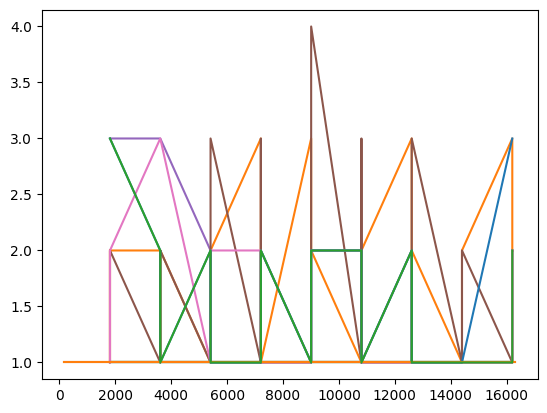

101


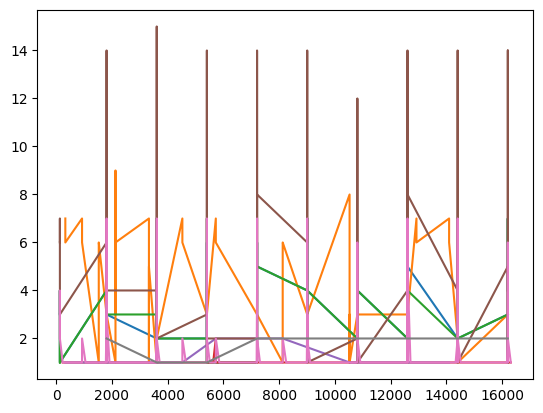

103


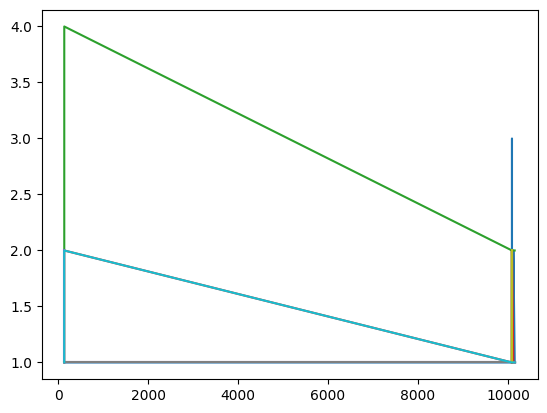

1000


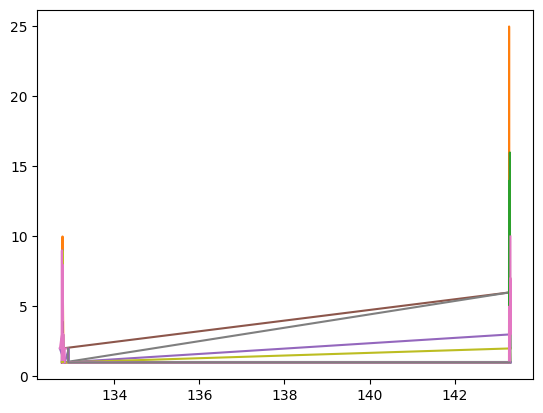

1001


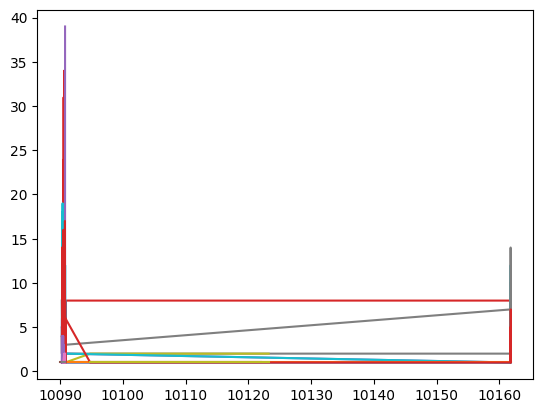

104


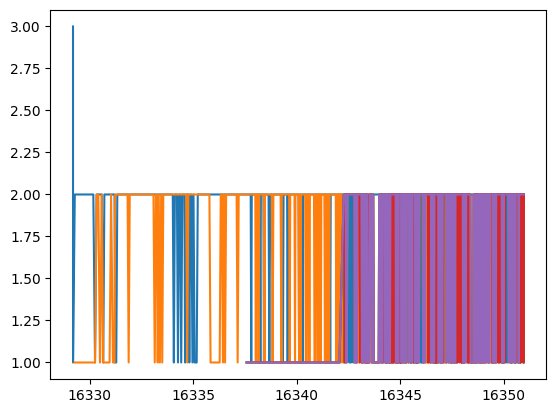

109


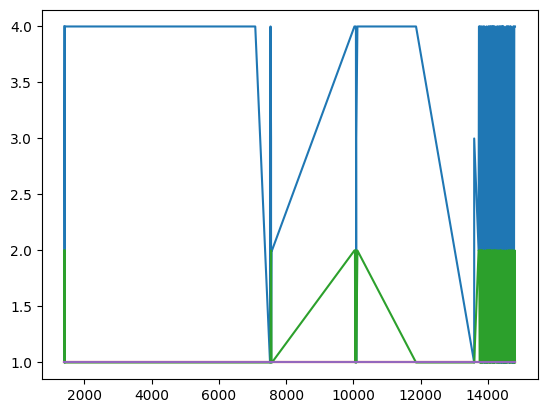

In [12]:
for user in allusers:
    if user != 0:
        print(user)
        prepare_all_user_event_timeseries(df, user)